# MATH 189 Final Project

by: Pranav Damal, Lucien Chen, Venz Burgos

## Objective: ...

## Thesis: ...

In [104]:
# pip install nfl_data_py
import nfl_data_py as nfl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from pandas.api.types import is_numeric_dtype

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)
sns.set_style("darkgrid")

## Top NFL QB per year 2006-2023

In [105]:
year = [2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]
highestQBR = {}
for x in year:
    df = nfl.import_qbr([x])
    rank1 = df['rank'].idxmin()
    name = df.loc[rank1, 'name_display']
    highestQBR[x] = name

# highestQBR is a dict with the year and rank 1 QB
# incase this data is needed
print(highestQBR)

{2006: 'Peyton Manning', 2007: 'Tom Brady', 2008: 'Peyton Manning', 2009: 'Drew Brees', 2010: 'Tom Brady', 2011: 'Aaron Rodgers', 2012: 'Peyton Manning', 2013: 'Peyton Manning', 2014: 'Tony Romo', 2015: 'Carson Palmer', 2016: 'Matt Ryan', 2017: 'Carson Wentz', 2018: 'Patrick Mahomes', 2019: 'Lamar Jackson', 2020: 'Aaron Rodgers', 2021: 'Aaron Rodgers', 2022: 'Patrick Mahomes', 2023: 'Brock Purdy'}


## Top College QB Prospects 2006-2023

In [106]:
"""
top_qb_prospects = {}

for year in range(2010, 2024):
    draft = nfl.import_draft_picks([year])
    firstQBs = draft[(draft['position'] == 'QB') & (draft['round'] == 1)]
    qbList = firstQBs['pfr_player_name'].tolist()
    top_qb_prospects[year] = qbList

for year, prospects in top_qb_prospects.items():
    print(f"first round QBs in {year}: {prospects}")
"""

'\ntop_qb_prospects = {}\n\nfor year in range(2010, 2024):\n    draft = nfl.import_draft_picks([year])\n    firstQBs = draft[(draft[\'position\'] == \'QB\') & (draft[\'round\'] == 1)]\n    qbList = firstQBs[\'pfr_player_name\'].tolist()\n    top_qb_prospects[year] = qbList\n\nfor year, prospects in top_qb_prospects.items():\n    print(f"first round QBs in {year}: {prospects}")\n'

## QB Data

In [107]:
college = pd.read_csv('./data/QBCollege.csv')
nfl = pd.read_csv('./data/QBNFL.csv')

college.head(5)

,player,year,player_id,position,team_name,player_game_count,accuracy_percent,aimed_passes,attempts,avg_depth_of_target,avg_time_to_throw,bats,big_time_throws,btt_rate,completion_percent,completions,declined_penalties,def_gen_pressures,drop_rate,dropbacks,drops,first_downs,franchise_id,grades_hands_fumble,grades_offense,grades_pass,grades_run,hit_as_threw,interceptions,passing_snaps,penalties,pressure_to_sack_rate,qb_rating,sack_percent,sacks,scrambles,spikes,thrown_aways,touchdowns,turnover_worthy_plays,twp_rate,yards,ypa,draft_pos
0,Michael Penix Jr.,2023,82134,QB,WASHINGTON,15,74.5,517,556,10.7,2.68,6,43,7.3,65.5,364,1,158,5.5,577,21,226,340,68.1,91.1,90.5,67.9,2,11,614,3,7.6,106.7,2.1,12,8,0,31,36,12,2.0,4906,8.8,8.0
1,Davis Brin,2023,77642,QB,GA SOUTHRN,13,75.0,525,556,8.4,2.52,6,20,3.4,64.7,360,0,159,8.6,610,34,183,174,52.6,71.5,70.5,60.5,5,19,637,2,18.9,84.6,4.9,30,21,5,15,24,31,4.9,3786,6.8,NaN
2,Brayden Schager,2023,146078,QB,HAWAII,13,72.9,495,526,10.3,2.80,7,28,5.1,62.9,331,0,212,8.3,598,30,173,180,63.6,77.7,76.1,64.3,5,14,626,3,18.9,87.8,6.7,40,32,2,17,26,14,2.2,3525,6.7,NaN
3,Alan Bowman,2023,77679,QB,OKLA STATE,14,71.8,457,502,8.6,2.46,3,20,3.8,60.6,304,0,100,7.3,515,24,174,262,71.8,74.8,74.4,53.9,0,14,538,1,6.0,79.6,1.2,6,5,0,42,15,22,4.1,3460,6.9,NaN
4,Cameron Ward,2023,133244,QB,WASH STATE,12,78.6,444,486,7.7,2.80,10,24,4.8,66.7,324,0,173,7.2,567,25,185,341,27.9,80.6,78.0,69.7,5,7,589,1,24.9,100.7,7.6,43,36,0,27,25,21,3.6,3723,7.7,NaN


In [108]:
nfl.head(5)

,Player,Year,Plays,EPA+CPOE composite,Adj. EPA/play,EPA/play,Success rate,Cmp%,Expected cmp%,CPOE,Air yards,Total EPA
0,Patrick Mahomes,2022,881,0.182,0.309,0.304,54.60%,71.9,67.8,4.1,7.2,267.8
1,Patrick Mahomes,2018,788,0.193,0.353,0.338,52.50%,67.5,63.8,3.7,9.3,266.3
2,Matt Ryan,2016,737,0.215,0.363,0.352,55.20%,71.0,63.9,7.1,8.8,259.4
3,Aaron Rodgers,2020,700,0.212,0.361,0.354,55.30%,73.7,66.9,6.8,8.0,247.8
4,Patrick Mahomes,2019,737,0.180,0.336,0.333,52.80%,67.9,65.6,2.3,8.5,245.4


In [109]:
college.shape, nfl.shape

((4949, 44), (677, 12))

In [110]:
college.dtypes

player                    object
year                       int64
player_id                  int64
position                  object
team_name                 object
player_game_count          int64
accuracy_percent         float64
aimed_passes               int64
attempts                   int64
avg_depth_of_target      float64
avg_time_to_throw        float64
bats                       int64
big_time_throws            int64
btt_rate                 float64
completion_percent       float64
completions                int64
declined_penalties         int64
def_gen_pressures          int64
drop_rate                float64
dropbacks                  int64
drops                      int64
first_downs                int64
franchise_id               int64
grades_hands_fumble      float64
grades_offense           float64
grades_pass              float64
grades_run               float64
hit_as_threw               int64
interceptions              int64
passing_snaps              int64
penalties 

In [111]:
nfl.dtypes

Player                 object
Year                    int64
Plays                   int64
EPA+CPOE composite    float64
Adj. EPA/play         float64
EPA/play              float64
Success rate           object
Cmp%                  float64
Expected cmp%         float64
CPOE                  float64
Air yards             float64
Total EPA             float64
dtype: object

In [112]:
college.describe()

,year,player_id,player_game_count,accuracy_percent,aimed_passes,attempts,avg_depth_of_target,avg_time_to_throw,bats,big_time_throws,btt_rate,completion_percent,completions,declined_penalties,def_gen_pressures,drop_rate,dropbacks,drops,first_downs,franchise_id,grades_hands_fumble,grades_offense,grades_pass,grades_run,hit_as_threw,interceptions,passing_snaps,penalties,pressure_to_sack_rate,qb_rating,sack_percent,sacks,scrambles,spikes,thrown_aways,touchdowns,turnover_worthy_plays,twp_rate,yards,ypa,draft_pos
count,4949.000000,4949.000000,4949.000000,4870.000000,4949.000000,4949.000000,4870.000000,4949.000000,4949.000000,4949.000000,4949.000000,4949.000000,4949.000000,4949.000000,4949.000000,4373.000000,4949.000000,4949.000000,4949.000000,4949.000000,4947.000000,4949.000000,4949.000000,4313.000000,4949.000000,4949.000000,4949.000000,4949.000000,3953.000000,4949.000000,4949.000000,4949.000000,4949.000000,4949.000000,4949.00000,4949.000000,4949.000000,4949.000000,4949.000000,4949.000000,340.000000
mean,2018.643564,69055.548192,5.049707,65.561971,95.255809,101.882198,10.568049,2.858792,1.594666,4.941806,4.189008,55.779349,61.157608,0.053748,36.224288,8.928722,116.497676,5.813094,33.096181,229.381087,57.641864,64.528107,61.424166,62.100580,0.980400,2.706405,122.498687,1.049101,19.524083,80.810305,5.457224,6.885836,7.397656,0.231764,3.81956,5.424934,4.889068,6.039887,750.323298,7.474682,111.594118
std,2.832113,42463.173966,4.198822,27.352853,133.762886,142.580408,7.667557,0.764729,2.661854,7.830914,10.971691,28.161376,88.825129,0.242804,49.689544,14.549657,160.908097,8.505005,51.863048,74.720989,17.793159,14.035542,14.992507,10.223384,1.760699,3.729658,169.205388,1.461239,20.189008,33.961965,8.071134,9.787769,11.521792,0.659666,6.11768,8.640902,6.596680,14.880476,1102.829428,7.328267,84.841897
min,2014.000000,9434.000000,1.000000,0.000000,0.000000,1.000000,-13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,101.000000,0.000000,16.000000,21.000000,23.700000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-16.000000,-16.000000,1.000000
25%,2016.000000,39879.000000,1.000000,59.025000,2.000000,2.000000,7.600000,2.490000,0.000000,0.000000,0.000000,48.600000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000,166.000000,46.600000,56.100000,51.700000,56.300000,0.000000,0.000000,2.000000,0.000000,2.600000,56.400000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,15.000000,4.300000,15.000000
50%,2019.000000,57455.000000,3.000000,69.200000,20.000000,21.000000,9.600000,2.750000,0.000000,1.000000,2.100000,58.200000,12.000000,0.000000,8.000000,6.900000,25.000000,1.000000,4.000000,226.000000,62.800000,65.300000,61.000000,61.700000,0.000000,1.000000,27.000000,0.000000,17.200000,82.200000,4.000000,2.000000,2.000000,0.000000,1.00000,1.000000,1.000000,2.900000,138.000000,6.800000,125.000000
75%,2021.000000,97993.000000,8.000000,77.800000,152.000000,162.000000,12.200000,3.100000,2.000000,7.000000,4.900000,66.700000,94.000000,0.000000,62.000000,10.900000,189.000000,9.000000,46.000000,300.000000,70.600000,74.200000,72.600000,68.400000,1.000000,5.000000,199.000000,2.000000,25.000000,102.100000,7.400000,11.000000,10.000000,0.000000,6.00000,7.000000,8.000000,5.300000,1133.000000,8.300000,188.250000
max,2023.000000,181169.000000,15.000000,100.000000,652.000000,692.000000,54.000000,9.900000,26.000000,54.000000,100.000000,100.000000,500.000000,2.000000,263.000000,100.000000,740.000000,44.000000,287.000000,351.000000,91.900000,95.800000,95.500000,94.500000,12.000000,23.000000,778.000000,12.000000,200.000000,158.300000,66.700000,54.000000,76.000000,7.000000,42.00000,62.000000,38.000000,100.000000,5940.000000,84.000000,262.000000


In [113]:
nfl.describe()

,Year,Plays,EPA+CPOE composite,Adj. EPA/play,EPA/play,Cmp%,Expected cmp%,CPOE,Air yards,Total EPA
count,677.000000,677.000000,677.000000,677.000000,677.000000,665.000000,665.000000,677.000000,665.000000,677.000000
mean,2019.144756,304.986706,0.062970,-0.029453,-0.061292,63.369173,65.933233,-2.517282,7.939699,21.879025
std,2.596599,282.274172,0.105231,0.386862,0.451488,12.614572,4.567258,11.629756,2.763835,59.589043
min,2015.000000,1.000000,-0.333000,-2.922000,-5.143000,0.000000,31.600000,-79.100000,-3.300000,-135.400000
25%,2017.000000,43.000000,0.009000,-0.136000,-0.155000,60.000000,63.800000,-5.500000,7.000000,-10.300000
50%,2019.000000,203.000000,0.054000,0.032000,0.011000,64.900000,66.100000,-0.700000,8.000000,1.100000
75%,2021.000000,591.000000,0.111000,0.145000,0.131000,68.600000,68.000000,2.300000,8.800000,41.300000
max,2023.000000,935.000000,0.785000,1.990000,1.990000,100.000000,87.600000,58.600000,35.000000,267.800000


In [114]:
college.columns

Index(['player', 'year', 'player_id', 'position', 'team_name',
       'player_game_count', 'accuracy_percent', 'aimed_passes', 'attempts',
       'avg_depth_of_target', 'avg_time_to_throw', 'bats', 'big_time_throws',
       'btt_rate', 'completion_percent', 'completions', 'declined_penalties',
       'def_gen_pressures', 'drop_rate', 'dropbacks', 'drops', 'first_downs',
       'franchise_id', 'grades_hands_fumble', 'grades_offense', 'grades_pass',
       'grades_run', 'hit_as_threw', 'interceptions', 'passing_snaps',
       'penalties', 'pressure_to_sack_rate', 'qb_rating', 'sack_percent',
       'sacks', 'scrambles', 'spikes', 'thrown_aways', 'touchdowns',
       'turnover_worthy_plays', 'twp_rate', 'yards', 'ypa', 'draft_pos'],
      dtype='object')

In [115]:
college.position.unique()

array(['QB', 'TE', 'HB', 'WR', 'P', 'FB', 'K', 'ED', 'LB', 'LS', 'ST',
       nan, 'S', 'T', 'CB'], dtype=object)

In [116]:
college = college.groupby("player").last().reset_index()

In [117]:
college = college[college.player.isin(nfl.Player)]

In [118]:
college_qb = college[college.position == "QB"]

In [119]:
college_qb.head()

,player,year,player_id,position,team_name,player_game_count,accuracy_percent,aimed_passes,attempts,avg_depth_of_target,avg_time_to_throw,bats,big_time_throws,btt_rate,completion_percent,completions,declined_penalties,def_gen_pressures,drop_rate,dropbacks,drops,first_downs,franchise_id,grades_hands_fumble,grades_offense,grades_pass,grades_run,hit_as_threw,interceptions,passing_snaps,penalties,pressure_to_sack_rate,qb_rating,sack_percent,sacks,scrambles,spikes,thrown_aways,touchdowns,turnover_worthy_plays,twp_rate,yards,ypa,draft_pos
31,Aidan O'Connell,2019,60516,QB,PURDUE,6,75.0,156,168,8.9,2.44,3,11,6.1,61.3,103,0,45,12.0,175,14,57,273,63.0,77.3,77.3,60.3,0,4,188,2,6.7,86.4,1.7,3,4,2,7,8,7,3.7,1101,6.6,135.0
87,Anthony Brown,2017,40316,QB,BOSTON COL,10,63.6,242,260,9.5,2.66,7,6,2.2,51.9,135,0,106,12.3,291,19,76,121,52.4,56.9,50.6,69.6,3,9,301,0,8.5,66.9,3.1,9,22,1,7,11,15,5.0,1366,5.3,NaN
96,Anthony Richardson,2020,124393,QB,FLORIDA,2,50.0,2,2,21.5,3.53,0,0,0.0,50.0,1,0,1,0.0,3,0,2,163,20.3,65.5,63.2,63.4,0,1,3,0,0.0,95.8,0.0,0,1,0,0,1,0,0.0,27,13.5,4.0
154,Bailey Zappe,2021,60396,QB,W KENTUCKY,14,77.3,649,691,8.6,2.47,11,48,6.5,68.7,475,0,94,5.4,730,27,287,346,73.2,87.8,87.4,53.3,3,11,774,7,16.0,118.5,2.1,15,24,1,27,62,24,3.1,5940,8.6,137.0
155,Baker Mayfield,2015,46518,QB,OKLAHOMA,13,77.2,381,396,9.0,2.91,3,25,6.0,67.7,268,0,163,8.8,484,26,194,261,61.1,91.7,91.5,68.2,0,7,504,1,24.5,120.3,8.3,40,48,1,11,36,11,2.2,3699,9.3,1.0


In [120]:
college_qb.shape

(94, 44)

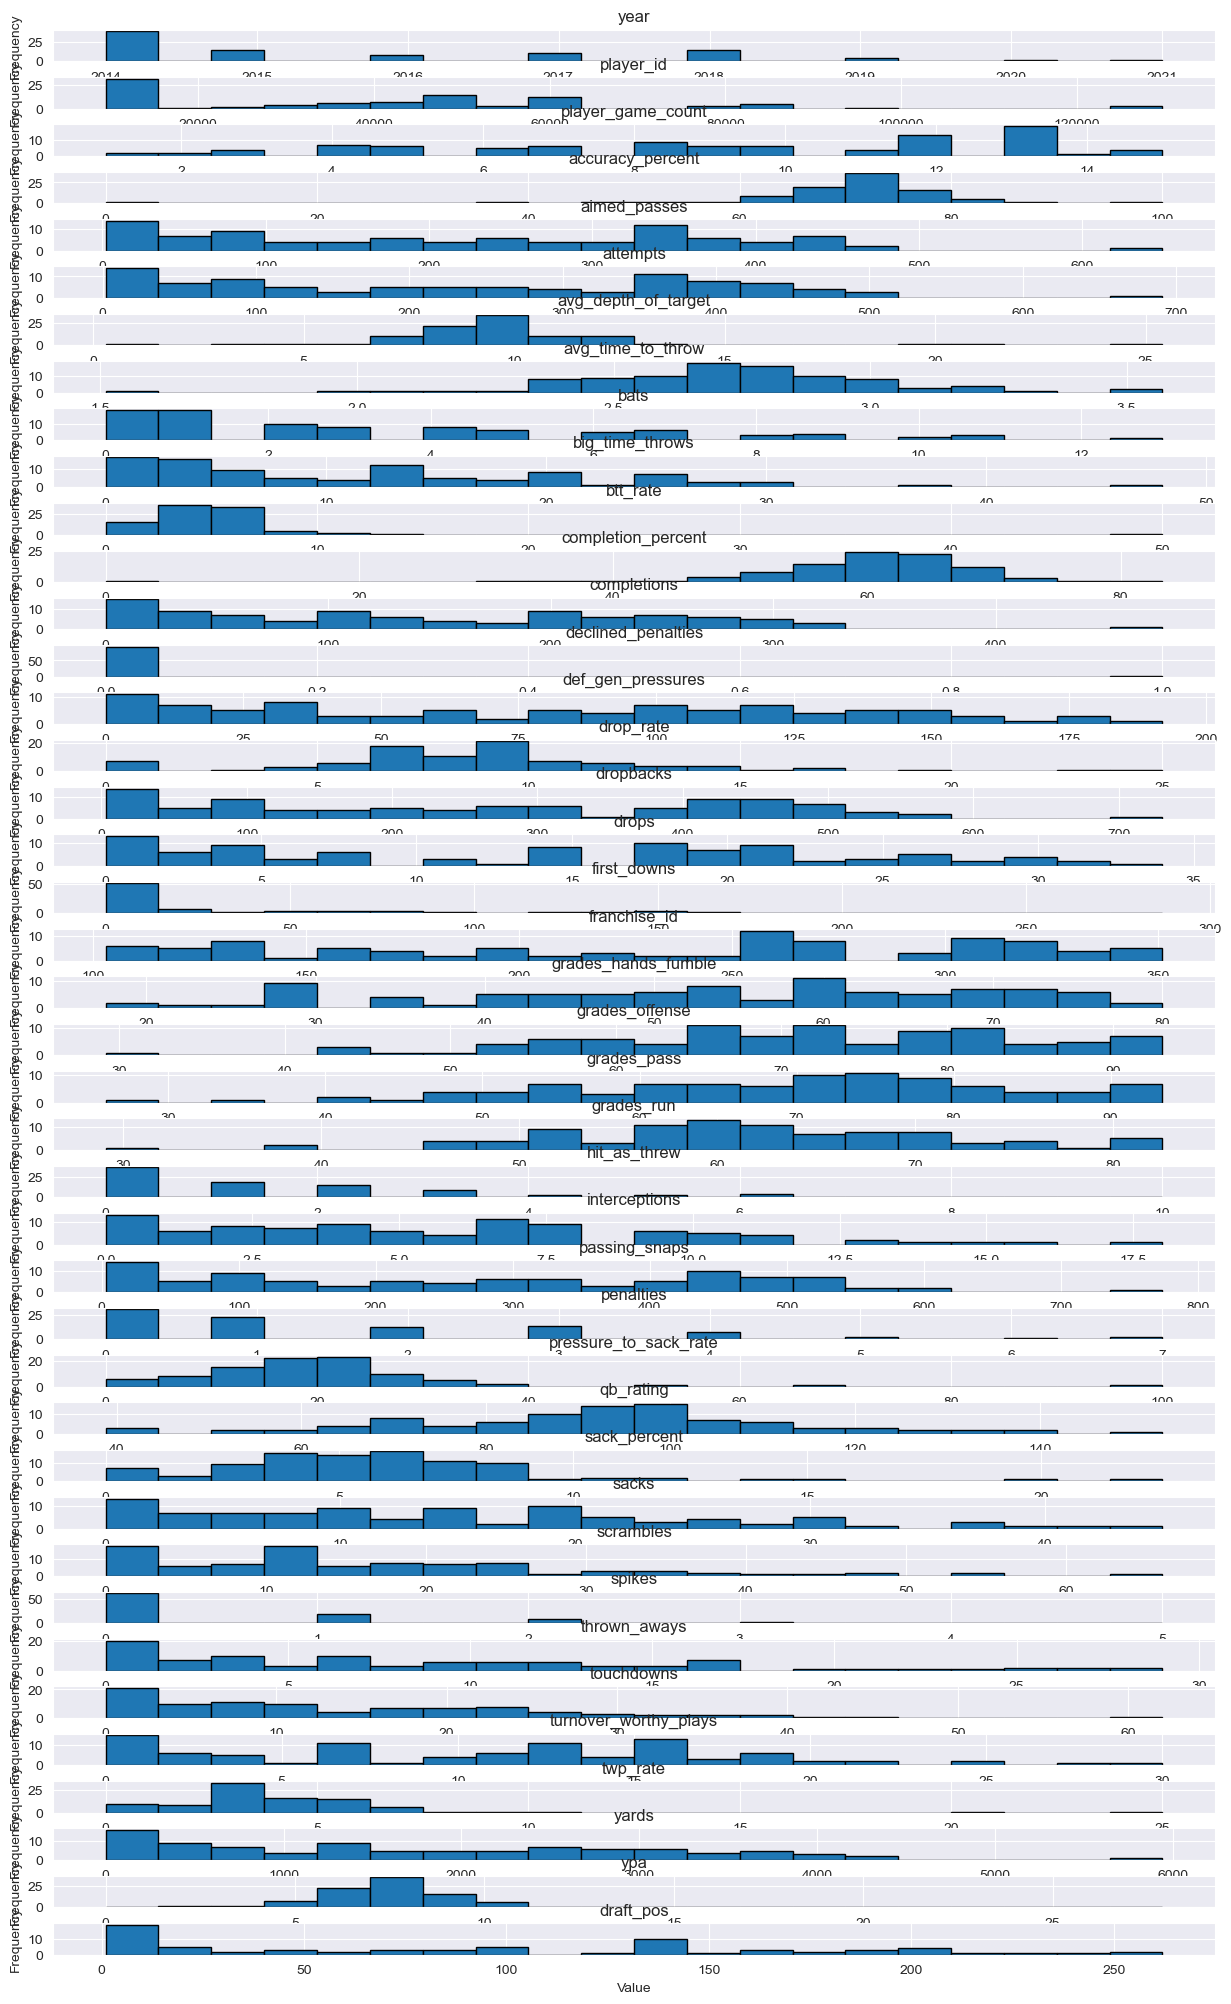

In [121]:
numerical_cols = college_qb.columns[[is_numeric_dtype(col) for col in college_qb.dtypes]]

fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=1, figsize=(15, 25))

for i, column in enumerate(numerical_cols):
    ax = axes[i]
    ax.hist(college_qb[column].dropna(), bins=20, edgecolor='black')
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

In [122]:
accuracy_threshold = college_qb.accuracy_percent.mean() + college_qb.accuracy_percent.std()

In [123]:
high_accuracy_qb = college_qb[college_qb.accuracy_percent > accuracy_threshold]

In [124]:
high_accuracy_qb.head()

,player,year,player_id,position,team_name,player_game_count,accuracy_percent,aimed_passes,attempts,avg_depth_of_target,avg_time_to_throw,bats,big_time_throws,btt_rate,completion_percent,completions,declined_penalties,def_gen_pressures,drop_rate,dropbacks,drops,first_downs,franchise_id,grades_hands_fumble,grades_offense,grades_pass,grades_run,hit_as_threw,interceptions,passing_snaps,penalties,pressure_to_sack_rate,qb_rating,sack_percent,sacks,scrambles,spikes,thrown_aways,touchdowns,turnover_worthy_plays,twp_rate,yards,ypa,draft_pos
306,Bryce Young,2020,123943,QB,ALABAMA,7,85.0,20,22,8.5,2.74,1,1,4.5,59.1,13,0,14,23.5,31,4,10,103,17.6,56.1,55.8,52.9,0,0,31,1,50.0,96.0,22.6,7,2,0,1,1,3,9.7,156,7.1,1.0
1207,Jarrett Stidham,2015,13725,QB,BAYLOR,10,81.0,100,109,11.9,2.57,4,14,12.3,68.8,75,0,32,7.4,133,6,52,118,52.6,89.3,91.5,56.5,2,2,139,1,28.1,136.9,6.8,9,15,0,3,12,2,1.4,1266,11.6,133.0
1287,Joe Burrow,2016,28022,QB,OHIO STATE,4,82.1,28,28,4.7,2.05,0,1,3.6,78.6,22,0,4,4.3,30,1,10,260,73.0,73.7,67.8,69.6,0,0,30,0,25.0,124.1,3.3,1,1,0,0,2,2,6.7,226,8.1,1.0
1667,Malik Willis,2017,60341,QB,AUBURN,4,83.3,6,6,0.3,1.51,0,0,0.0,83.3,5,0,1,0.0,7,0,2,115,75.0,84.2,59.6,80.0,0,0,8,0,100.0,137.5,14.3,1,0,0,0,1,0,0.0,45,7.5,86.0
2387,Tyler Huntley,2016,46448,QB,UTAH,3,100.0,5,7,6.2,1.96,2,1,14.3,71.4,5,0,3,0.0,7,0,2,328,27.4,62.4,76.9,52.9,0,0,7,0,0.0,97.3,0.0,0,0,0,0,0,0,0.0,60,8.6,NaN


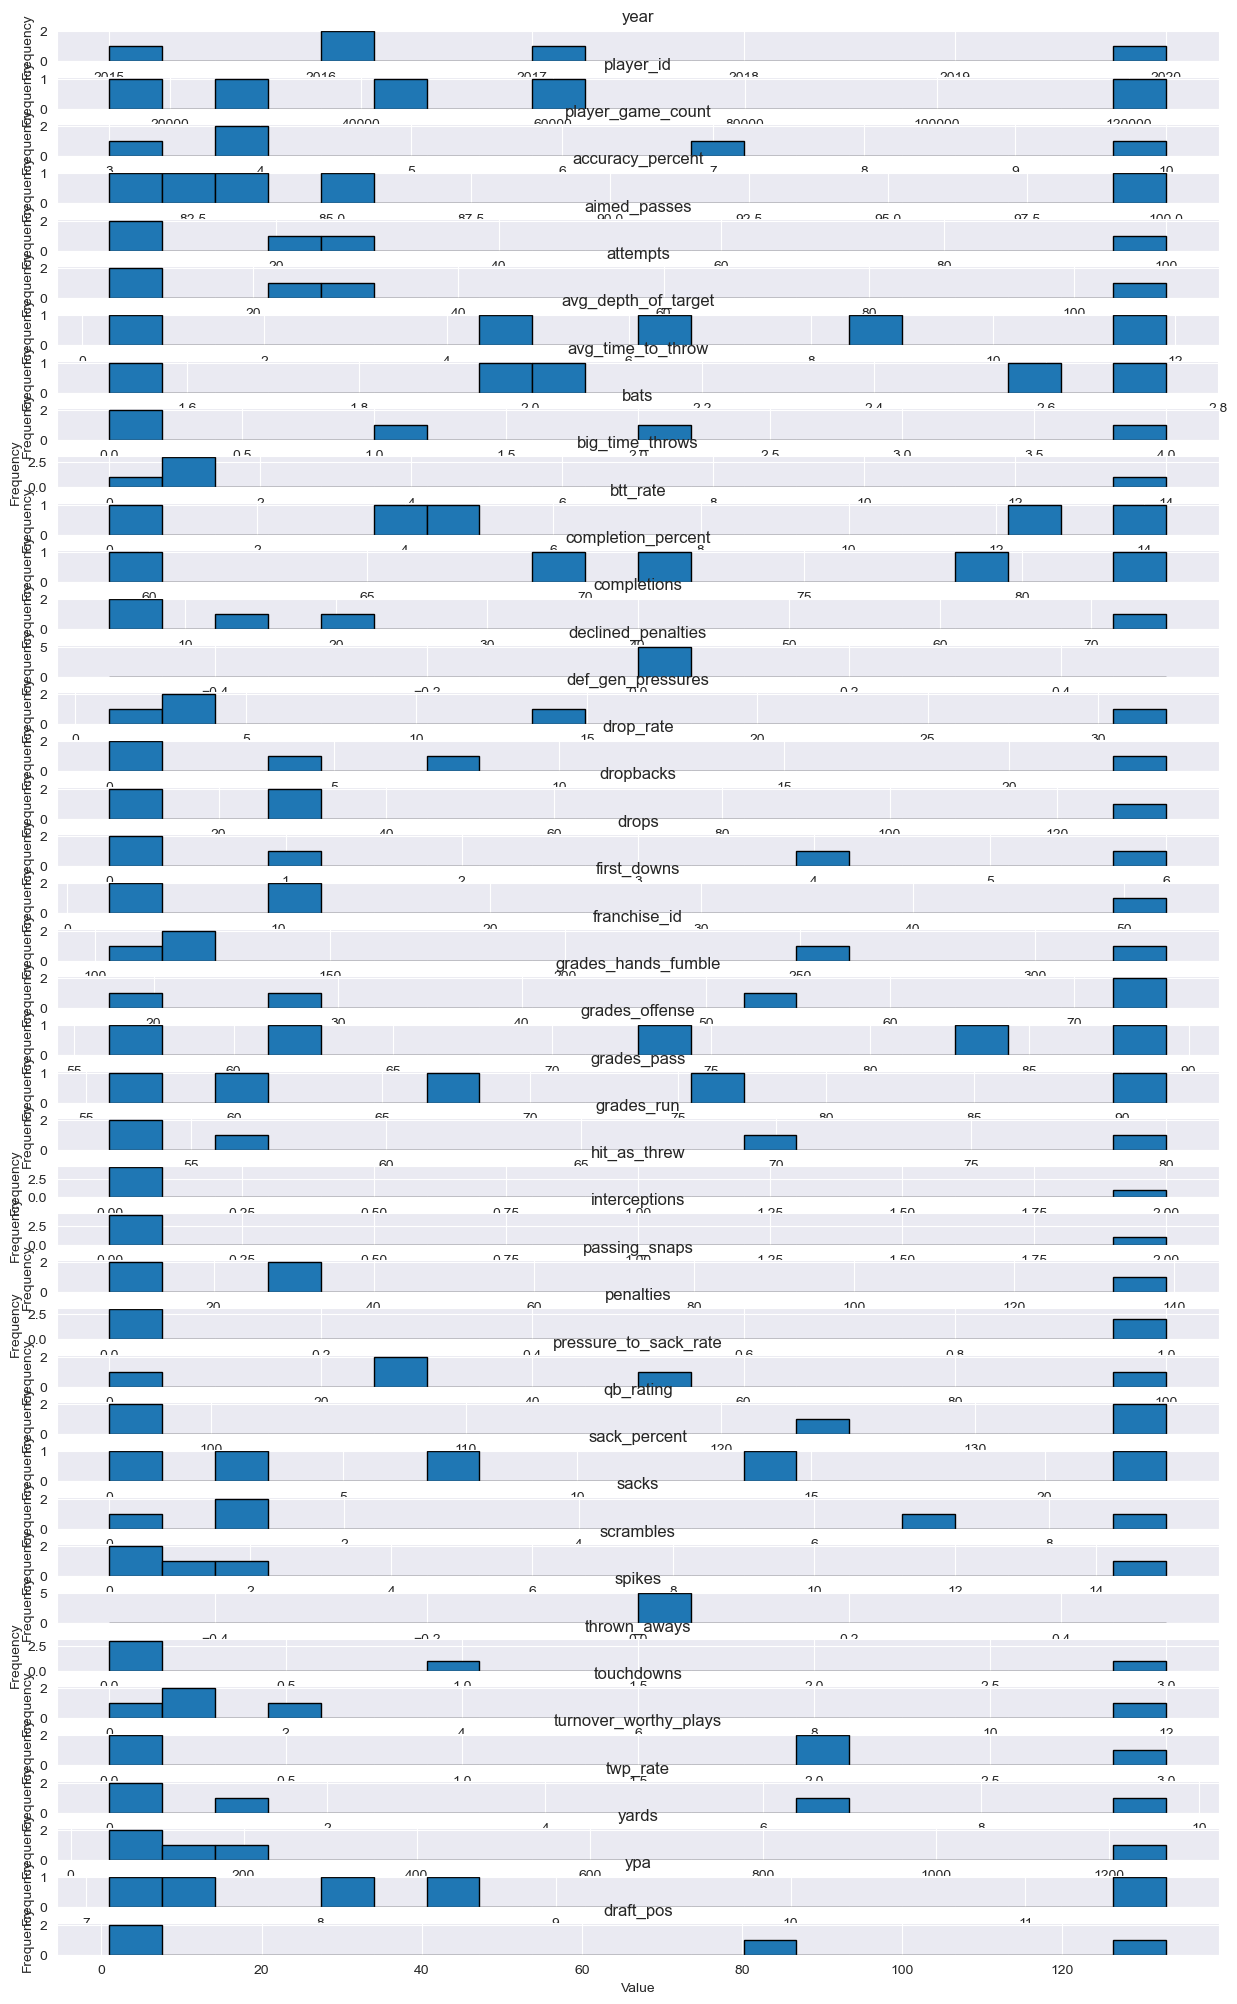

In [125]:
numerical_cols = college_qb.columns[[is_numeric_dtype(col) for col in college_qb.dtypes]]

fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=1, figsize=(15, 25))

for i, column in enumerate(numerical_cols):
    ax = axes[i]
    ax.hist(high_accuracy_qb[column].dropna(), bins=20, edgecolor='black')
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

In [126]:
from pandas.api.types import is_numeric_dtype

<Axes: >

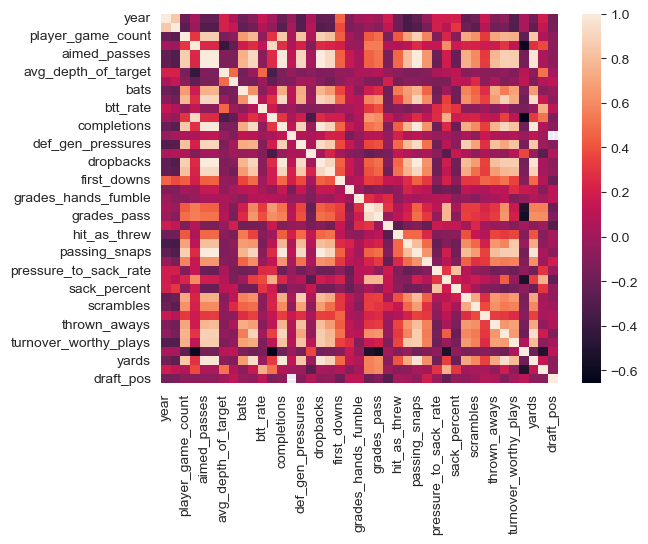

In [127]:
sns.heatmap(
    college[college.columns[college.dtypes.apply(is_numeric_dtype)]].corr()
)

<Axes: >

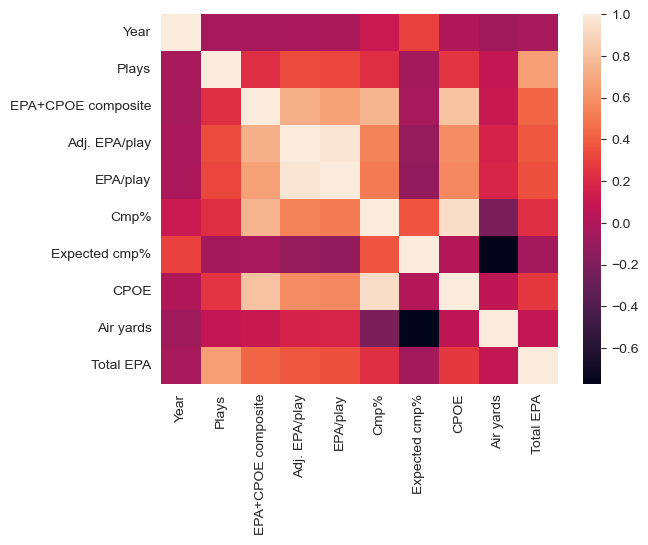

In [128]:
sns.heatmap(
    nfl[nfl.columns[nfl.dtypes.apply(is_numeric_dtype)]].corr()
)

<Axes: >

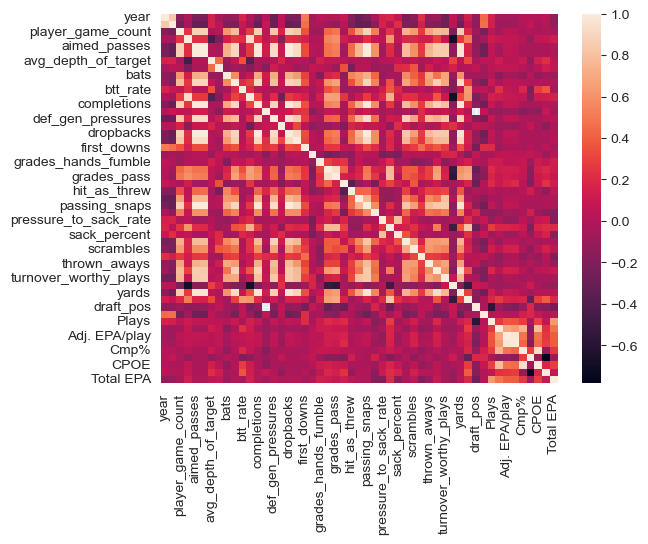

In [129]:
combined = pd.merge(college, nfl, left_on="player", right_on="Player")
sns.heatmap(
    combined[combined.columns[combined.dtypes.apply(is_numeric_dtype)]].corr()
)

<Axes: xlabel='draft_pos', ylabel='Total EPA'>

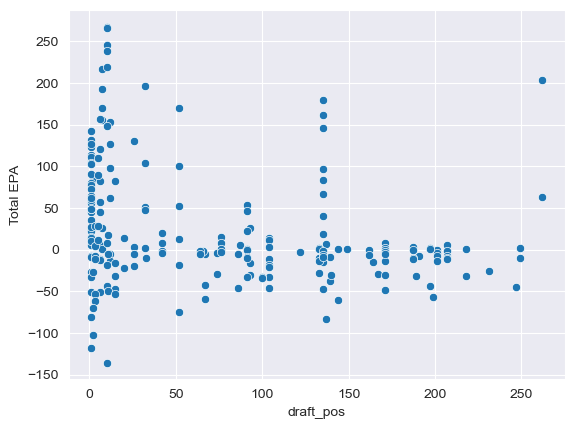

In [130]:
sns.scatterplot(x=combined.draft_pos, y=combined["Total EPA"])

In [133]:
college.columns.to_list()

['player',
 'year',
 'player_id',
 'position',
 'team_name',
 'player_game_count',
 'accuracy_percent',
 'aimed_passes',
 'attempts',
 'avg_depth_of_target',
 'avg_time_to_throw',
 'bats',
 'big_time_throws',
 'btt_rate',
 'completion_percent',
 'completions',
 'declined_penalties',
 'def_gen_pressures',
 'drop_rate',
 'dropbacks',
 'drops',
 'first_downs',
 'franchise_id',
 'grades_hands_fumble',
 'grades_offense',
 'grades_pass',
 'grades_run',
 'hit_as_threw',
 'interceptions',
 'passing_snaps',
 'penalties',
 'pressure_to_sack_rate',
 'qb_rating',
 'sack_percent',
 'sacks',
 'scrambles',
 'spikes',
 'thrown_aways',
 'touchdowns',
 'turnover_worthy_plays',
 'twp_rate',
 'yards',
 'ypa',
 'draft_pos']

In [143]:
college.columns

Index(['player', 'year', 'player_id', 'position', 'team_name',
       'player_game_count', 'accuracy_percent', 'aimed_passes', 'attempts',
       'avg_depth_of_target', 'avg_time_to_throw', 'bats', 'big_time_throws',
       'btt_rate', 'completion_percent', 'completions', 'declined_penalties',
       'def_gen_pressures', 'drop_rate', 'dropbacks', 'drops', 'first_downs',
       'franchise_id', 'grades_hands_fumble', 'grades_offense', 'grades_pass',
       'grades_run', 'hit_as_threw', 'interceptions', 'passing_snaps',
       'penalties', 'pressure_to_sack_rate', 'qb_rating', 'sack_percent',
       'sacks', 'scrambles', 'spikes', 'thrown_aways', 'touchdowns',
       'turnover_worthy_plays', 'twp_rate', 'yards', 'ypa', 'draft_pos'],
      dtype='object')

In [163]:
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

# Split the data into training and test sets
cols = college.columns[college.dtypes.apply(is_numeric_dtype)]
X = combined[cols]
y = combined["Total EPA"]

mean_imputer = SimpleImputer(strategy='mean')

X = mean_imputer.fit_transform(X)
# Create a Ridge regression object
ridge = Ridge(alpha=1.0)

# Fit the model to the training data
ridge.fit(X, y)

Ridge()

In [156]:
ridge.intercept_

-4724.207967925454

In [166]:
pd.DataFrame(index=cols, data=ridge.coef_, columns=["coef"])

,coef
year,2.415801
player_id,-0.000273
player_game_count,-0.385412
accuracy_percent,1.143609
aimed_passes,2.991055
attempts,5.441347
avg_depth_of_target,-0.260882
avg_time_to_throw,0.773195
bats,3.447240
big_time_throws,-2.344980
